In [1]:
import metpy.calc as mpcalc

In [2]:
import metpy.constants as mpconst



In [3]:
from metpy.calc import reduce_point_density
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots import add_metpy_logo, current_weather, sky_cover, StationPlot

In [4]:
from siphon.catalog import TDSCatalog

In [5]:
url='https://thredds.ucar.edu/thredds/catalog/nexrad/level3/N0B/TLX/20220504/catalog.html'

In [6]:
print(url)

https://thredds.ucar.edu/thredds/catalog/nexrad/level3/N0B/TLX/20220504/catalog.html


In [7]:
url_xml = url.replace(".html", ".xml")

In [8]:
cat = TDSCatalog(url_xml)

In [9]:
print(cat.datasets)

['Level3_TLX_N0B_20220504_1950.nids', 'Level3_TLX_N0B_20220504_1948.nids', 'Level3_TLX_N0B_20220504_1946.nids', 'Level3_TLX_N0B_20220504_1944.nids', 'Level3_TLX_N0B_20220504_1943.nids', 'Level3_TLX_N0B_20220504_1939.nids', 'Level3_TLX_N0B_20220504_1937.nids', 'Level3_TLX_N0B_20220504_1936.nids', 'Level3_TLX_N0B_20220504_1934.nids', 'Level3_TLX_N0B_20220504_1932.nids', 'Level3_TLX_N0B_20220504_1931.nids', 'Level3_TLX_N0B_20220504_1929.nids', 'Level3_TLX_N0B_20220504_1927.nids', 'Level3_TLX_N0B_20220504_1925.nids', 'Level3_TLX_N0B_20220504_1923.nids', 'Level3_TLX_N0B_20220504_1921.nids', 'Level3_TLX_N0B_20220504_1920.nids', 'Level3_TLX_N0B_20220504_1918.nids', 'Level3_TLX_N0B_20220504_1916.nids', 'Level3_TLX_N0B_20220504_1914.nids', 'Level3_TLX_N0B_20220504_1912.nids', 'Level3_TLX_N0B_20220504_1910.nids', 'Level3_TLX_N0B_20220504_1908.nids', 'Level3_TLX_N0B_20220504_1906.nids', 'Level3_TLX_N0B_20220504_1904.nids', 'Level3_TLX_N0B_20220504_1903.nids', 'Level3_TLX_N0B_20220504_1901.nids', 

In [10]:
print('Total files: ' + str(len(cat.datasets)))

Total files: 408


In [11]:
ds = cat.datasets[0]
ds.access_urls

{'OPENDAP': 'https://thredds.ucar.edu/thredds/dodsC/nexrad/level3/N0B/TLX/20220504/Level3_TLX_N0B_20220504_1950.nids',
 'HTTPServer': 'https://thredds.ucar.edu/thredds/fileServer/nexrad/level3/N0B/TLX/20220504/Level3_TLX_N0B_20220504_1950.nids',
 'CdmRemote': 'https://thredds.ucar.edu/thredds/cdmremote/nexrad/level3/N0B/TLX/20220504/Level3_TLX_N0B_20220504_1950.nids',
 'NCML': 'https://thredds.ucar.edu/thredds/ncml/nexrad/level3/N0B/TLX/20220504/Level3_TLX_N0B_20220504_1950.nids',
 'UDDC': 'https://thredds.ucar.edu/thredds/uddc/nexrad/level3/N0B/TLX/20220504/Level3_TLX_N0B_20220504_1950.nids',
 'ISO': 'https://thredds.ucar.edu/thredds/iso/nexrad/level3/N0B/TLX/20220504/Level3_TLX_N0B_20220504_1950.nids'}

In [12]:
from datetime import datetime


In [13]:
import xarray as xr

In [14]:
from metpy.units import units

In [15]:
 
from siphon.radarserver import RadarServer

In [16]:
cat = TDSCatalog('https://thredds.ucar.edu/thredds/radarServer/catalog.xml')

In [17]:
list(cat.catalog_refs)

['NEXRAD Level II Radar for Case Study CCS039',
 'NEXRAD Level II Radar from IDD',
 'NEXRAD Level III Radar for Case Study CCS039',
 'NEXRAD Level III Radar from IDD',
 'TDWR Level III Radar from IDD']

In [18]:
cat.catalog_refs['NEXRAD Level III Radar from IDD'].href

'https://thredds.ucar.edu/thredds/radarServer/nexrad/level3/IDD/dataset.xml'

In [19]:
rs= RadarServer(cat.catalog_refs['NEXRAD Level III Radar from IDD'].href)

In [20]:
from datetime import datetime,timedelta

In [21]:
query = rs.query()
now=datetime.utcnow()
query.stations('TLX').time_range(now - timedelta(hours=1), now).variables('N0B')

var=N0B&time_start=2022-05-04T18%3A51%3A21.369189&time_end=2022-05-04T19%3A51%3A21.369189&stn=TLX

In [22]:
query_cat = rs.get_catalog(query)

In [23]:
sorted(query_cat.datasets)

['Level3_TLX_N0B_20220504_1852.nids',
 'Level3_TLX_N0B_20220504_1854.nids',
 'Level3_TLX_N0B_20220504_1856.nids',
 'Level3_TLX_N0B_20220504_1858.nids',
 'Level3_TLX_N0B_20220504_1859.nids',
 'Level3_TLX_N0B_20220504_1901.nids',
 'Level3_TLX_N0B_20220504_1903.nids',
 'Level3_TLX_N0B_20220504_1904.nids',
 'Level3_TLX_N0B_20220504_1906.nids',
 'Level3_TLX_N0B_20220504_1908.nids',
 'Level3_TLX_N0B_20220504_1910.nids',
 'Level3_TLX_N0B_20220504_1912.nids',
 'Level3_TLX_N0B_20220504_1914.nids',
 'Level3_TLX_N0B_20220504_1916.nids',
 'Level3_TLX_N0B_20220504_1918.nids',
 'Level3_TLX_N0B_20220504_1920.nids',
 'Level3_TLX_N0B_20220504_1921.nids',
 'Level3_TLX_N0B_20220504_1923.nids',
 'Level3_TLX_N0B_20220504_1925.nids',
 'Level3_TLX_N0B_20220504_1927.nids',
 'Level3_TLX_N0B_20220504_1929.nids',
 'Level3_TLX_N0B_20220504_1931.nids',
 'Level3_TLX_N0B_20220504_1932.nids',
 'Level3_TLX_N0B_20220504_1934.nids',
 'Level3_TLX_N0B_20220504_1936.nids',
 'Level3_TLX_N0B_20220504_1937.nids',
 'Level3_TLX

In [24]:
#query.stations('TLX','LTX').time_range(now - timedelta(hours=1), now).variables('N0B', 'N0C')
query.stations('TLX').time_range(now - timedelta(hours=1), now).variables('N0B')

var=N0B&time_start=2022-05-04T18%3A51%3A21.369189&time_end=2022-05-04T19%3A51%3A21.369189&stn=TLX

In [25]:
query_cat = rs.get_catalog(query)

sorted(query_cat.datasets)

['Level3_TLX_N0B_20220504_1852.nids',
 'Level3_TLX_N0B_20220504_1854.nids',
 'Level3_TLX_N0B_20220504_1856.nids',
 'Level3_TLX_N0B_20220504_1858.nids',
 'Level3_TLX_N0B_20220504_1859.nids',
 'Level3_TLX_N0B_20220504_1901.nids',
 'Level3_TLX_N0B_20220504_1903.nids',
 'Level3_TLX_N0B_20220504_1904.nids',
 'Level3_TLX_N0B_20220504_1906.nids',
 'Level3_TLX_N0B_20220504_1908.nids',
 'Level3_TLX_N0B_20220504_1910.nids',
 'Level3_TLX_N0B_20220504_1912.nids',
 'Level3_TLX_N0B_20220504_1914.nids',
 'Level3_TLX_N0B_20220504_1916.nids',
 'Level3_TLX_N0B_20220504_1918.nids',
 'Level3_TLX_N0B_20220504_1920.nids',
 'Level3_TLX_N0B_20220504_1921.nids',
 'Level3_TLX_N0B_20220504_1923.nids',
 'Level3_TLX_N0B_20220504_1925.nids',
 'Level3_TLX_N0B_20220504_1927.nids',
 'Level3_TLX_N0B_20220504_1929.nids',
 'Level3_TLX_N0B_20220504_1931.nids',
 'Level3_TLX_N0B_20220504_1932.nids',
 'Level3_TLX_N0B_20220504_1934.nids',
 'Level3_TLX_N0B_20220504_1936.nids',
 'Level3_TLX_N0B_20220504_1937.nids',
 'Level3_TLX

In [26]:
#product_codes = ['NCR', 'N0B','N0C']
product_codes = ['N0B']
query_catalogs=dict()
for product_code in product_codes:
    query.stations('TLX').time_range(now - timedelta(hours=1), now).variables(product_code)
    query_cat = rs.get_catalog(query)
    query_catalogs[product_code]=query_cat
    


In [27]:
query_catalogs

{'N0B': Radar NEXRAD Level III Radar from IDD datasets in near real time}

In [28]:
sorted(query_catalogs['N0B'].datasets)

['Level3_TLX_N0B_20220504_1852.nids',
 'Level3_TLX_N0B_20220504_1854.nids',
 'Level3_TLX_N0B_20220504_1856.nids',
 'Level3_TLX_N0B_20220504_1858.nids',
 'Level3_TLX_N0B_20220504_1859.nids',
 'Level3_TLX_N0B_20220504_1901.nids',
 'Level3_TLX_N0B_20220504_1903.nids',
 'Level3_TLX_N0B_20220504_1904.nids',
 'Level3_TLX_N0B_20220504_1906.nids',
 'Level3_TLX_N0B_20220504_1908.nids',
 'Level3_TLX_N0B_20220504_1910.nids',
 'Level3_TLX_N0B_20220504_1912.nids',
 'Level3_TLX_N0B_20220504_1914.nids',
 'Level3_TLX_N0B_20220504_1916.nids',
 'Level3_TLX_N0B_20220504_1918.nids',
 'Level3_TLX_N0B_20220504_1920.nids',
 'Level3_TLX_N0B_20220504_1921.nids',
 'Level3_TLX_N0B_20220504_1923.nids',
 'Level3_TLX_N0B_20220504_1925.nids',
 'Level3_TLX_N0B_20220504_1927.nids',
 'Level3_TLX_N0B_20220504_1929.nids',
 'Level3_TLX_N0B_20220504_1931.nids',
 'Level3_TLX_N0B_20220504_1932.nids',
 'Level3_TLX_N0B_20220504_1934.nids',
 'Level3_TLX_N0B_20220504_1936.nids',
 'Level3_TLX_N0B_20220504_1937.nids',
 'Level3_TLX

In [29]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from siphon.cdmr import Dataset

%matplotlib inline
#

In [30]:
data = query_cat.datasets[0].remote_access()
print(list(data.variables))

['elevation', 'azimuth', 'gate', 'latitude', 'longitude', 'altitude', 'rays_time', 'BaseReflectivityDR_RAW', 'BaseReflectivityDR']


In [31]:
field_name = 'BaseReflectivityDR'
#field_name = 'CorrelationCoefficient'

range_data = data.variables['gate'][:]
azimuth_data = data.variables['azimuth'][:]
radar_data = data.variables[field_name][:]


In [32]:
x = range_data * np.sin(np.deg2rad(azimuth_data))[:,None]

y = range_data * np.cos(np.deg2rad(azimuth_data))[:,None]

In [33]:
radar_data = np.ma.array(radar_data, mask = np.isnan(radar_data))

In [34]:
#proj = cartopy.crs.LambertConformal(central_longitude=data.RadarLongitude,
#                                  central_latitude=data.RadarLatitude)


proj = ccrs.LambertConformal(central_longitude=data.RadarLongitude,
                                  central_latitude=data.RadarLatitude)

#proj = ccrs.PlateCarree()



In [35]:
print(data.time_coverage_start)
data_time = datetime.strptime(data.time_coverage_start, '%Y-%m-%dT%H:%M:%SZ')
print(data_time)

2022-05-04T19:16:01Z
2022-05-04 19:16:01


/home/pmccrone/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


TextCollection

/home/pmccrone/anaconda3/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


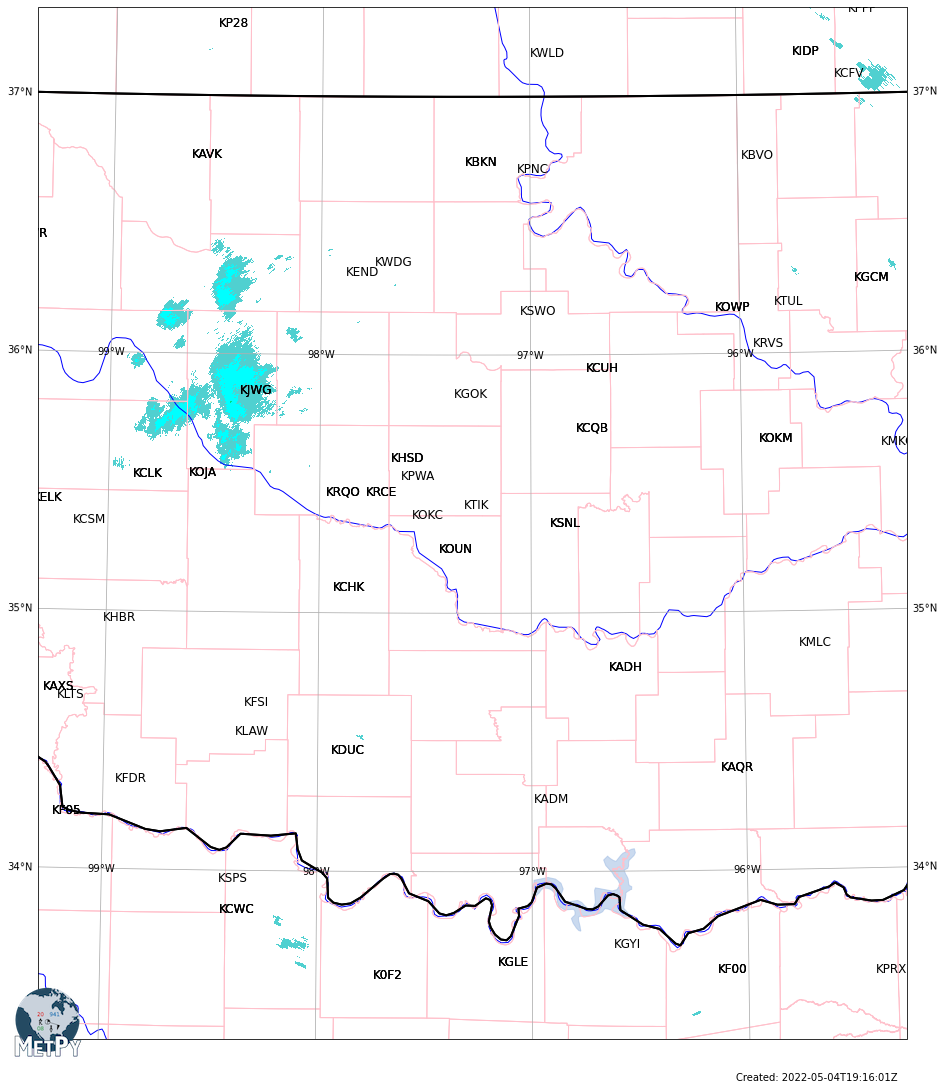

In [36]:
from metpy.plots import ctables, add_timestamp, add_metpy_logo
#import cartopy.crs as ccrs

import cartopy.feature as cfeature

state_borders = cartopy.feature.NaturalEarthFeature( category='cultural', 
                                                    name='admin_1_states_provinces_lakes',
                                                   scale='50m', facecolor='none')



#import cartopy.io.shapereader as shpreader
#reader = shpreader.Reader('/home/pmccrone/data/GIS/shapefile/countyl010g.shp')
#counties = list(reader.geometries())

#-COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())
#-COUNTIES = cfeature.ShapelyFeature(counties, ccrs.LambertConformal())
#COUNTIES1 = cartopy.feature.ShapelyFeature(counties, ccrs.LambertConformal())



fig = plt.figure(figsize=(19,19))
ax = plt.subplot(1, 1, 1, projection=proj)

#norm, cmap = ctables.registry.get_with_steps('NWSReflectivity', 16, 16)
#norm, cmap = ctables.registry.get_with_steps('NWSReflectivityExpanded', 16, 16)
norm, cmap = ctables.registry.get_with_steps('precipitation', 16, 16)

mesh = ax.pcolormesh(x, y, radar_data, norm=norm, cmap=cmap, zorder=0)
add_timestamp(ax, time=data_time)
add_metpy_logo(fig, y=30)
ax.add_feature(state_borders, edgecolor='black', linewidth=2, zorder=2)

#ax.add_feature(COUNTIES1, color='black')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS, color='blue')
ax.gridlines(draw_labels=True)

from metpy.plots import USCOUNTIES

ax.add_feature(USCOUNTIES.with_scale('500k'), edgecolor='pink')


distance_in_degrees = 2.0

ax.set_extent([data.RadarLongitude - distance_in_degrees,
              data.RadarLongitude + distance_in_degrees,
              data.RadarLatitude - distance_in_degrees,
              data.RadarLatitude + distance_in_degrees ])


mdata = metar.parse_metar_file(get_test_data('metar_20190701_1200.txt', as_file_obj=False))
#mdata = data.dropna(how='any', subset=['wind_direction', 'wind_speed'])

stationplot = StationPlot(ax, mdata['longitude'].values, mdata['latitude'].values,
                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=12)

stationplot.plot_text((2, 0), mdata['station_id'].values)